In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [100]:
col_names = ["user_id", "operator_name", "content_id", "content_title", "show_duration"]
content_watch = pd.read_csv('content_watch.csv',
                 sep='\t',
                 header=None,
                 names = col_names)
content_watch.head()

,user_id,operator_name,content_id,content_title,show_duration
0,827375963,Rostelecom,9966,Луна,1400
1,890810589,LLC TOMTEL,10140,Солдаты,1271
2,929088258,OJS Moscow city telephone network,9572,Мажор,30
3,987577016,Rostelecom,8014,Клуб Винкс – Школа волшебниц,1310
4,573841374,OJS Moscow city telephone network,9983,Метод,3205


In [101]:
content_watch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
user_id          20000 non-null int64
operator_name    20000 non-null object
content_id       20000 non-null int64
content_title    20000 non-null object
show_duration    20000 non-null object
dtypes: int64(2), object(3)
memory usage: 781.3+ KB


In [102]:
content_watch['content_id'] = content_watch['content_id'].astype('object')
content_watch['user_id'] = content_watch['user_id'].astype('object')

In [103]:
content_watch['show_duration'] = content_watch['show_duration'].replace({'None': 0})
content_watch['show_duration'] = content_watch['show_duration'].astype('int')
content_watch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
user_id          20000 non-null object
operator_name    20000 non-null object
content_id       20000 non-null object
content_title    20000 non-null object
show_duration    20000 non-null int64
dtypes: int64(1), object(4)
memory usage: 781.3+ KB


In [118]:
male_prob = 0.4
content_watch["gender"] = np.random.binomial(1, male_prob, content_watch.shape[0])
content_watch.head()

,user_id,operator_name,content_id,content_title,show_duration,gender
0,827375963,Rostelecom,9966,Луна,1400,1
1,890810589,LLC TOMTEL,10140,Солдаты,1271,0
2,929088258,OJS Moscow city telephone network,9572,Мажор,30,1
3,987577016,Rostelecom,8014,Клуб Винкс – Школа волшебниц,1310,1
4,573841374,OJS Moscow city telephone network,9983,Метод,3205,1


**Какой фильм был просмотрен максимальным количеством человек?
Какой пользователь посмотрел больше всех фильмов? **

In [167]:
content_watch[content_watch['show_duration'] != 0].drop_duplicates(['user_id', 'content_title'])\
    ['content_title'].value_counts().head(1)

Мастер и Маргарита    1586
Name: content_title, dtype: int64

In [168]:
#content_watch.drop_duplicates(['user_id', 'content_title'])['user_id'].value_counts().head()
content_watch[content_watch['show_duration'] != 0].drop_duplicates(['user_id', 'content_title'])\
    ['user_id'].value_counts().head(1)

446413452    6
Name: user_id, dtype: int64

** У какого оператора больше всего пользователей? **

In [130]:
content_watch.drop_duplicates('user_id')['operator_name'].value_counts().head(1)

Rostelecom    2230
Name: operator_name, dtype: int64

** Постройте любую визуализацию с помощью метода plot **

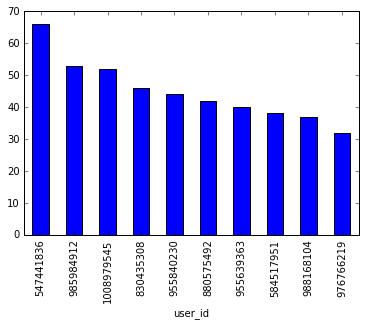

In [114]:
content_watch.groupby('user_id')['content_title']\
    .agg(np.count_nonzero)\
    .sort_values(ascending=False).head(10).plot(kind='bar')

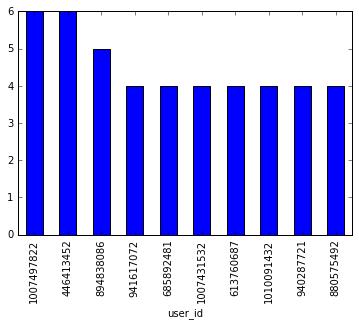

In [111]:
content_watch.drop_duplicates(['user_id', 'content_title']).groupby('user_id')['content_title']\
    .agg(np.count_nonzero)\
    .sort_values(ascending=False).head(10).plot(kind='bar')

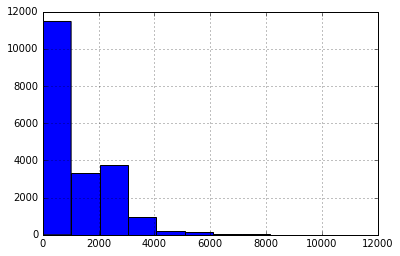

In [116]:
content_watch['show_duration'].hist()

** Какой средний показатель по числу просмотренных фильмов среди мужчин - пользователей Ростелекома? **

In [166]:
content_watch[(content_watch['gender'] == 1) & (content_watch['operator_name'] == 'Rostelecom')]\
    .groupby('user_id')['content_title'].agg(np.count_nonzero).mean()

1.6857610474631752

**Построить по данным файла content_watch.csv матрицу user-item **

В матрице должно быть 2 столбца

Первый столбец - user_id

Второй столбец - list из content_id, которые смотрел user_id. Оставлять нужно только уникальные id контента - повторов быть не должно 

In [156]:
uс = content_watch.sort_values(by = 'user_id', ascending=True)\
    [['user_id', 'content_id']].drop_duplicates(['user_id', 'content_id'])

In [157]:
user_item = [[user, [content for content in uс[uс['user_id'] == user]['content_id']]] for user in 
              set(uс['user_id'])]

In [158]:
user_item

[[911867909, [7305]],
 [908722187, [7097]],
 [442761229, [10209]],
 [908034061, [136040]],
 [1009680402, [10275]],
 [1009319955, [85498]],
 [939327514, [10209]],
 [957087771, [168226]],
 [958595102, [7312]],
 [606175265, [10845]],
 [808484898, [137334]],
 [883752993, [7305]],
 [887324708, [7305]],
 [960364579, [7305]],
 [1008631852, [7305]],
 [954597423, [7305]],
 [1008304178, [9572]],
 [843907126, [9219]],
 [713162813, [7607]],
 [661880904, [107228]],
 [181436490, [7498]],
 [1007124559, [7029]],
 [931070038, [7097]],
 [1007878246, [10684]],
 [893452391, [7305]],
 [454557811, [9669]],
 [964657274, [9714]],
 [794722429, [9570]],
 [1008664702, [7177]],
 [859373697, [7305]],
 [947159171, [8769]],
 [902922372, [10112]],
 [933232773, [10209]],
 [1005977731, [160609]],
 [987791516, [6793]],
 [482574495, [7318]],
 [951779488, [9572]],
 [761626785, [10697]],
 [616988846, [9219]],
 [1008402611, [7305]],
 [858718389, [7607]],
 [591691966, [7235]],
 [802160830, [7097]],
 [973373632, [7498]],
 [10